<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Correlation**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis (EDA). You will examine the distribution of the data, identify outliers, and determine the correlation between different columns in the dataset.


## Objectives


In this lab, you will perform the following:


- Identify the distribution of compensation data in the dataset.

- Remove outliers to refine the dataset.

- Identify correlations between various features in the dataset.


## Hands on Lab


##### Step 1: Install and Import Required Libraries


In [ ]:
# !pip install pandas
# !pip install matplotlib
# !pip install seaborn

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Step 2: Load the Dataset


In [2]:
# Load the dataset from the given URL
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(file_url)

# Display the first few rows to understand the structure of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


In [3]:
data = df.copy()

<h3>Step 3: Analyze and Visualize Compensation Distribution</h3>


**Task**: Plot the distribution and histogram for `ConvertedCompYearly` to examine the spread of yearly compensation among respondents.


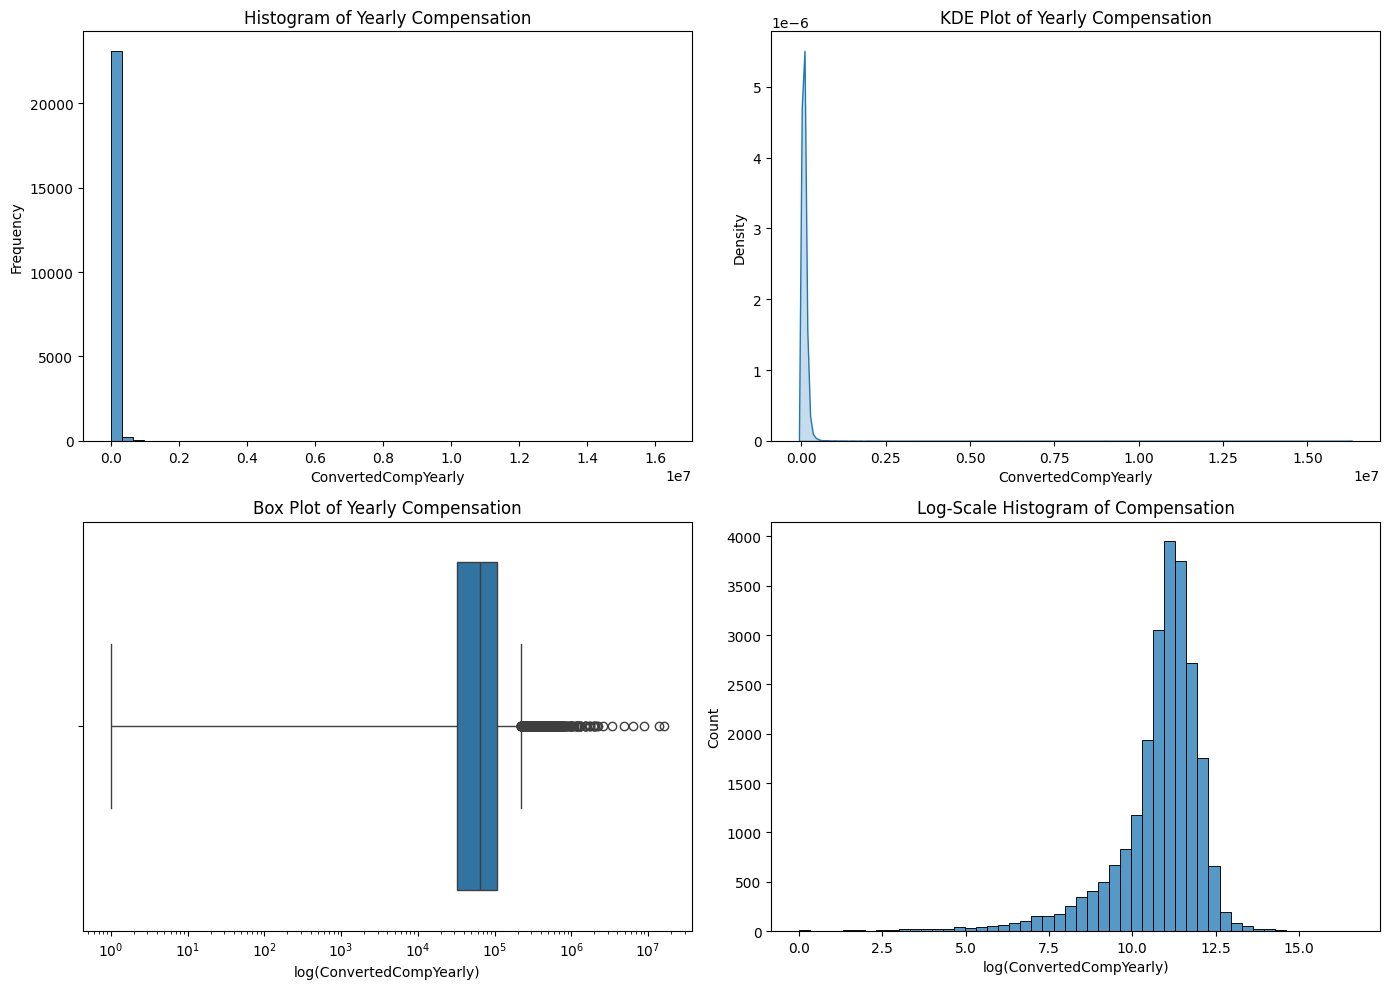

In [4]:
# Remove rows with null ConvertedCompYearly
comp_data = data['ConvertedCompYearly'].dropna()

# Set up subplots
plt.figure(figsize=(14, 10))

# Histogram
plt.subplot(2, 2, 1)
sns.histplot(comp_data, bins=50)
plt.title('Histogram of Yearly Compensation')
plt.xlabel('ConvertedCompYearly')
plt.ylabel('Frequency')

# KDE plot
plt.subplot(2, 2, 2)
sns.kdeplot(comp_data, fill=True)
plt.title('KDE Plot of Yearly Compensation')
plt.xlabel('ConvertedCompYearly')

# Box plot
plt.subplot(2, 2, 3)
sns.boxplot(x=comp_data)
plt.title('Box Plot of Yearly Compensation')
plt.xlabel('log(ConvertedCompYearly)')
plt.xscale('log')

# Log-transformed histogram
plt.subplot(2, 2, 4)
sns.histplot(comp_data[comp_data > 0].apply(np.log), bins=50)
plt.title('Log-Scale Histogram of Compensation')
plt.xlabel('log(ConvertedCompYearly)')

plt.tight_layout()
plt.show()


<h3>Step 4: Calculate Median Compensation for Full-Time Employees</h3>


**Task**: Filter the data to calculate the median compensation for respondents whose employment status is "Employed, full-time."


In [5]:
emp_full = data[data['Employment'] == 'Employed, full-time']
emp_full_median = emp_full['ConvertedCompYearly'].median()
print(f'Median: {emp_full_median}')

Median: 69814.0


<h3>Step 5: Analyzing Compensation Range and Distribution by Country</h3>


Explore the range of compensation in the ConvertedCompYearly column by analyzing differences across countries. Use box plots to compare the compensation distributions for each country to identify variations and anomalies within each region, providing insights into global compensation trends.



In [6]:
data['Country'].value_counts().head(10)

Country
United States of America                                11095
Germany                                                  4947
India                                                    4231
United Kingdom of Great Britain and Northern Ireland     3224
Ukraine                                                  2672
France                                                   2110
Canada                                                   2104
Poland                                                   1534
Netherlands                                              1449
Brazil                                                   1375
Name: count, dtype: int64

In [7]:
# Map top 10 countries
country_mapping = {
    'United States of America': 'USA',
    'Germany': 'Germany',
    'India': 'India',
    'United Kingdom of Great Britain and Northern Ireland': 'UK',
    'Ukraine': 'Ukraine',
    'France': 'France',
    'Canada': 'Canada',
    'Poland': 'Poland',
    'Netherlands': 'Netherlands',
    'Brazil': 'Brazil'    
}
data['Country_mapped'] = data['Country'].map(country_mapping).fillna('Other')
data['Country_mapped'].value_counts()

Country_mapped
Other          30696
USA            11095
Germany         4947
India           4231
UK              3224
Ukraine         2672
France          2110
Canada          2104
Poland          1534
Netherlands     1449
Brazil          1375
Name: count, dtype: int64

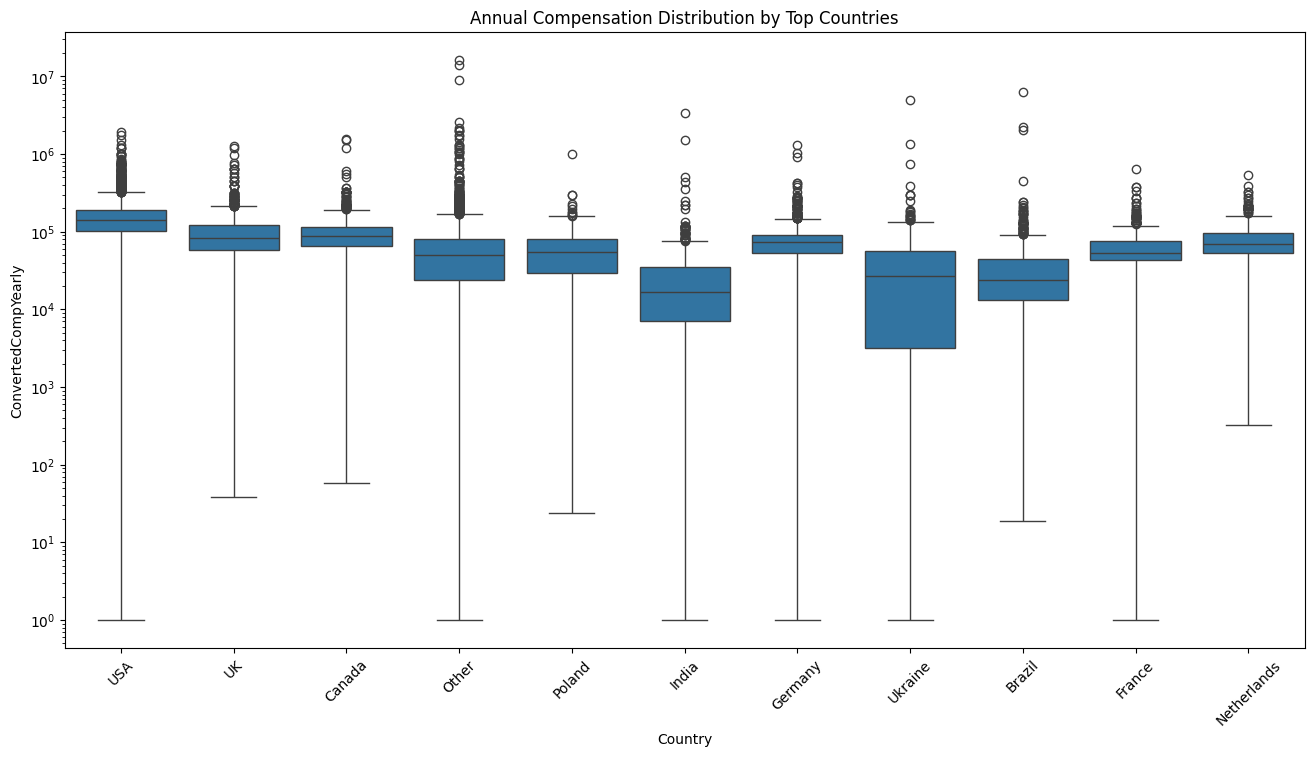

In [ ]:
# Box plot
plt.figure(figsize=(16, 8))
sns.boxplot(x='Country_mapped', y='ConvertedCompYearly', data=data)
plt.title(f'Annual Compensation Distribution by Top Countries')
plt.xlabel('Country')
plt.ylabel('ConvertedCompYearly')
plt.yscale('log')
plt.xticks(rotation=45)
plt.show()

<h3>Step 6: Removing Outliers from the Dataset</h3>


**Task**: Create a new DataFrame by removing outliers from the `ConvertedCompYearly` column to get a refined dataset for correlation analysis.


In [9]:
# Remove rows with null ConvertedCompYearly
data_no_OL = data.dropna(subset=['ConvertedCompYearly'])

# Calculate the Interquartile Range (IQR)
Q1 = data_no_OL['ConvertedCompYearly'].quantile(0.25)
Q3 = data_no_OL['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1

# Determine the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create a new DataFrame by removing outliers from ConvertedCompYearly
data_no_OL = data_no_OL[(data_no_OL['ConvertedCompYearly'] >= lower_bound) & (data_no_OL['ConvertedCompYearly'] <= upper_bound)]

print(f"Before outlier removal: {len(data)}")
print(f"After outlier removal: {len(data_no_OL)}")

Before outlier removal: 65437
After outlier removal: 22457


<h3>Step 7: Finding Correlations Between Key Variables</h3>


**Task**: Calculate correlations between `ConvertedCompYearly`, `WorkExp`, and `JobSatPoints_1`. Visualize these correlations with a heatmap.


In [10]:
# Calculate correlations between ConvertedCompYearly, WorkExp, and JobSatPoints_1
cols = ['ConvertedCompYearly', 'WorkExp', 'JobSatPoints_1']
corr_matrix = data_no_OL[cols].corr()
corr_matrix

,ConvertedCompYearly,WorkExp,JobSatPoints_1
ConvertedCompYearly,1.000000,0.408438,-0.058170
WorkExp,0.408438,1.000000,-0.032388
JobSatPoints_1,-0.058170,-0.032388,1.000000


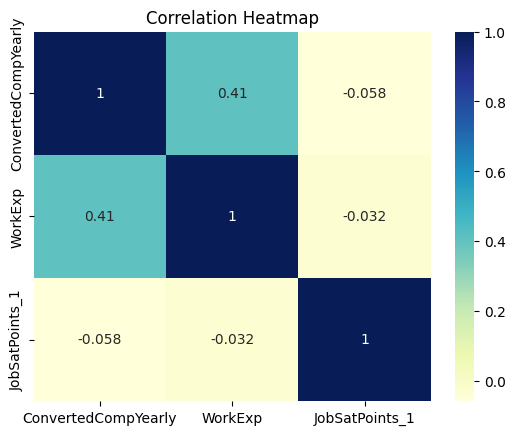

In [11]:
# Visualize these correlations with a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu')
plt.title('Correlation Heatmap')
plt.show()

<h3>Step 8: Scatter Plot for Correlations</h3>


**Task**: Create scatter plots to examine specific correlations between `ConvertedCompYearly` and `WorkExp`, as well as between `ConvertedCompYearly` and `JobSatPoints_1`.


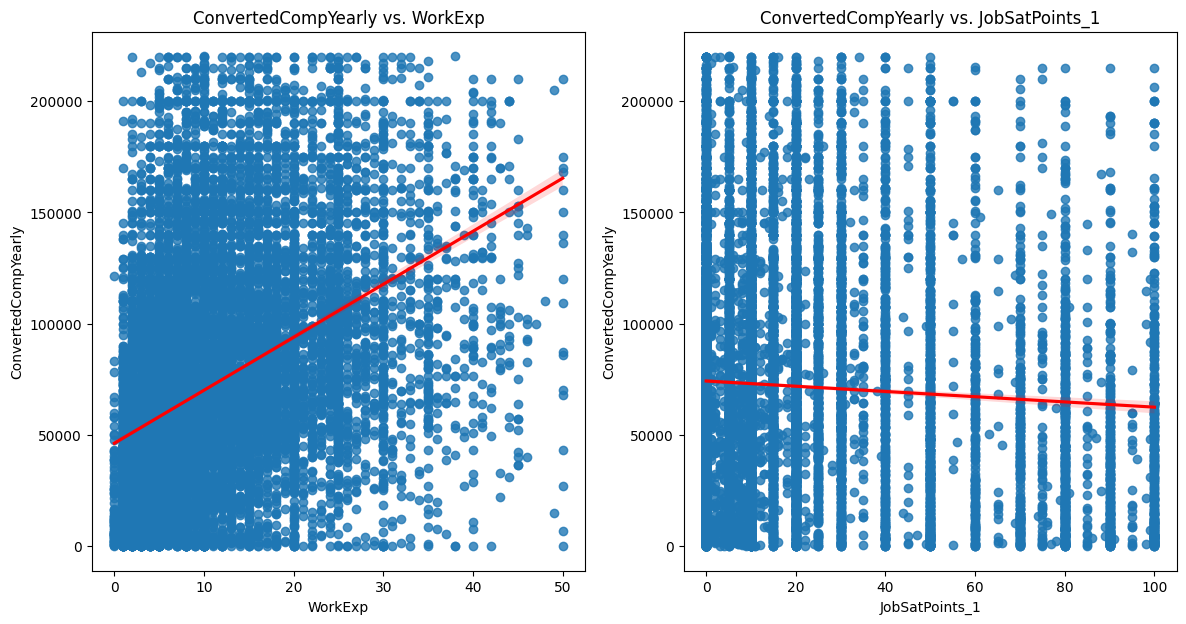

In [12]:
plt.figure(figsize=(14, 7))

# ConvertedCompYearly vs. WorkExp
plt.subplot(1, 2, 1)
sns.regplot(data=data_no_OL, x='WorkExp', y='ConvertedCompYearly', line_kws={'color': 'red'})
plt.title('ConvertedCompYearly vs. WorkExp')

# ConvertedCompYearly vs. JobSatPoints_1
plt.subplot(1, 2, 2)
sns.regplot(data=data_no_OL, x='JobSatPoints_1', y='ConvertedCompYearly', line_kws={'color': 'red'})
plt.title('ConvertedCompYearly vs. JobSatPoints_1')

plt.show()

<h3>Summary</h3>


In this lab, you practiced essential skills in correlation analysis by:

- Examining the distribution of yearly compensation with histograms and box plots.
- Detecting and removing outliers from compensation data.
- Calculating correlations between key variables such as compensation, work experience, and job satisfaction.
- Visualizing relationships with scatter plots and heatmaps to gain insights into the associations between these features.

By following these steps, you have developed a solid foundation for analyzing relationships within the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
